<a href="https://colab.research.google.com/github/kayserena/machine_learning_datathon_5/blob/main/Datathon_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Data Engineering

In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv('/content/mhealth.csv')
df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


In [ ]:
print(df.shape)
df.describe()

(999999, 14)


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
count,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.00000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000
mean,1.473954,-9.618162,-0.944714,-0.023928,-0.616830,-0.131466,-3.578801,-5.72591,2.645165,-0.293943,-0.450610,0.283440,1.702181
std,3.751845,4.076683,5.333969,0.495758,0.354135,0.547774,4.770602,5.70559,3.897641,0.528506,0.564118,0.558707,3.250841
min,-22.146000,-19.619000,-19.373000,-2.146600,-7.789900,-2.567800,-22.361000,-18.97200,-18.239000,-8.339200,-3.570800,-2.689700,0.000000
25%,0.115100,-10.116000,-2.662400,-0.454550,-0.816140,-0.561890,-5.984100,-9.36790,0.406120,-0.711760,-0.882960,-0.211210,0.000000
50%,1.336800,-9.644800,-0.016372,-0.070501,-0.703560,-0.137520,-2.859700,-7.35990,2.231200,-0.372550,-0.622180,0.325430,0.000000
75%,2.586900,-9.034300,1.371500,0.426720,-0.542210,0.345780,-1.021200,-2.45280,5.201200,0.049020,-0.080082,0.786640,2.000000
max,20.054000,21.161000,25.015000,60.484000,2.011300,2.770100,19.864000,22.19100,25.741000,3.319600,1.556500,2.750000,12.000000


In [ ]:
df.dtypes

alx         float64
aly         float64
alz         float64
glx         float64
gly         float64
glz         float64
arx         float64
ary         float64
arz         float64
grx         float64
gry         float64
grz         float64
Activity      int64
subject      object
dtype: object

In [ ]:
# Calculating the missing threshold based on the sampled data
missing_threshold = 0.5 * len(df)

# Identifying columns with more than 50% missing values in the sampled data
columns_to_drop = df.columns[df.isnull().sum() > missing_threshold]

# Calculating the number of missing values in each column of the sampled dataset
missing_values = df.isnull().sum()

missing_values, columns_to_drop

(alx         0
 aly         0
 alz         0
 glx         0
 gly         0
 glz         0
 arx         0
 ary         0
 arz         0
 grx         0
 gry         0
 grz         0
 Activity    0
 subject     0
 dtype: int64,
 Index([], dtype='object'))

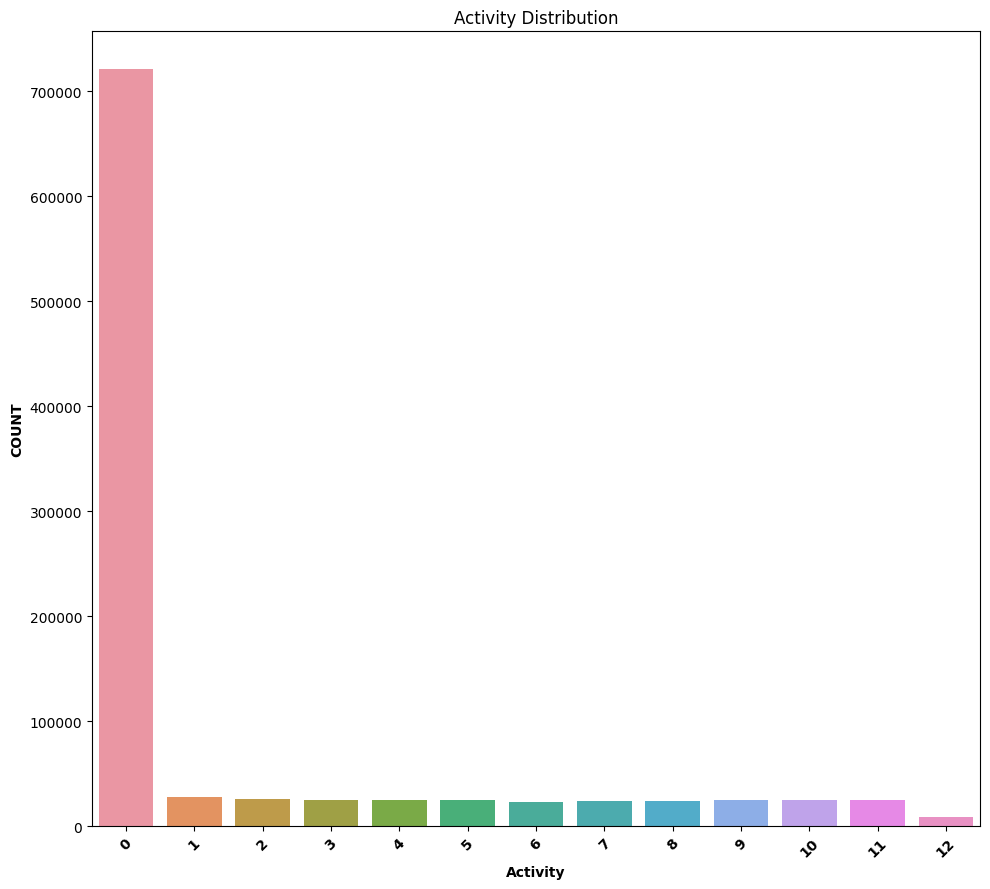

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# New color palette
new_colors = ["#eaac8b", "#e56b6f", "#b56576", "#6d597a", "#355070"]  # A more varied color palette
sns.set_palette(sns.color_palette(new_colors))

# plot distribution of outcome, activity
plt.figure(figsize=(10, 9))
sns.countplot(x='Activity', data=df)
plt.title('Activity Distribution')
plt.xlabel('Activity', fontweight='bold')
plt.ylabel('COUNT', fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
updated_activity_distribution_fig = plt.gcf()
plt.show()

#notice imbalance across 0 and all other activities

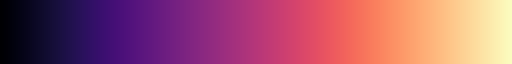

In [ ]:
# Setting the color palette to 'mako' which has maroon-like colors
sns.color_palette("magma", as_cmap=True)

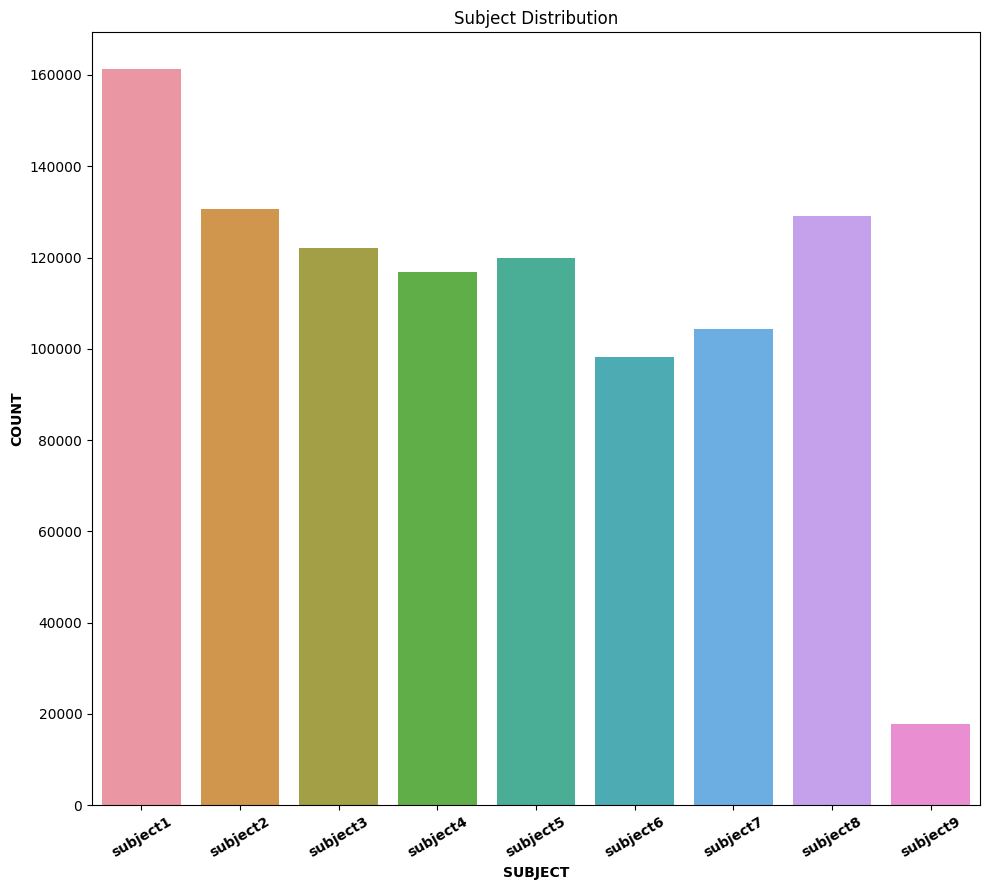

In [ ]:
# Subject Distribution plot
plt.figure(figsize=(10, 9))
sns.countplot(x='subject', data=df)
plt.title('Subject Distribution')
plt.xlabel('SUBJECT', fontweight='bold')
plt.ylabel('COUNT', fontweight='bold')
plt.xticks(rotation=30, fontweight='bold')
plt.xticks(rotation=30)
plt.tight_layout()
updated_subject_distribution_fig = plt.gcf()
plt.show()

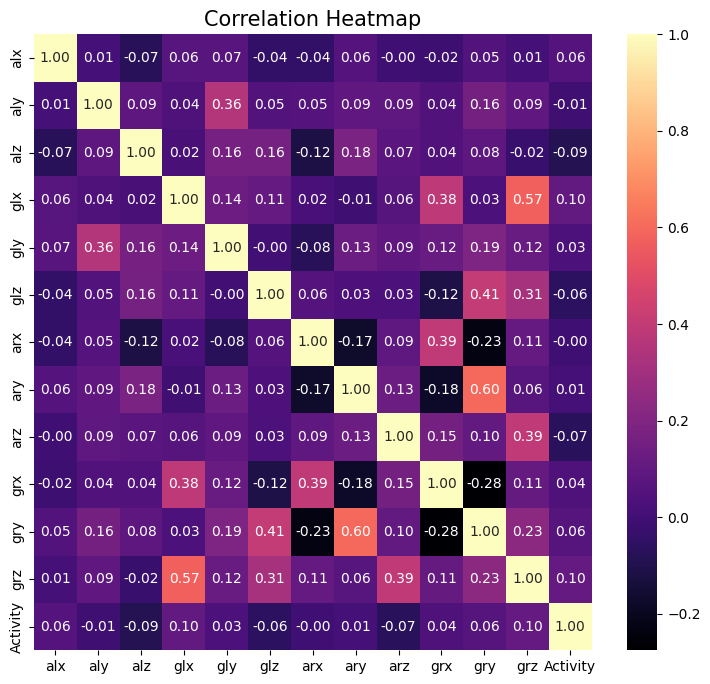

In [ ]:
import numpy as np

# For the correlation heatmap, we'll use only numerical columns.
# We'll update the list of numerical features to exclude columns with 'subject' in their names.
numerical_features = [
    col for col in df.select_dtypes(include=[np.number]).columns
    if not col.startswith('subject')
]

# Recalculate the correlation matrix without the 'subject' columns
correlation_matrix = df[numerical_features].corr()

# Plot the updated correlation heatmap
plt.figure(figsize=(9, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='magma')
plt.title('Correlation Heatmap', fontsize=15)
plt.show()


In [ ]:
# Feature Encoding
# Encoding the 'subject' column
subject_mapping = {'subject1': 1, 'subject2': 2, 'subject3': 3, 'subject4': 4, 'subject5': 5,
                   'subject6': 6, 'subject7': 7, 'subject8': 8, 'subject9': 9,}

df['subject'] = df['subject'].map(subject_mapping)

# Data Splitting and Normalization

In [ ]:
from sklearn.model_selection import train_test_split

# Grouping by 'subject' and creating a list of dataframes, one per group
grouped = df.groupby('subject')
grouped_dfs = [group for _, group in grouped]

# Splitting the groups into training and test sets with an 80:20 ratio
train_groups, test_groups = train_test_split(grouped_dfs, test_size=0.2, random_state=42)

# Reassembling the training and test datasets from the groups
train_df = pd.concat(train_groups)
test_df = pd.concat(test_groups)

print(train_df['subject'].unique())
print(test_df['subject'].unique())

# Displaying the shape of the training and test sets
train_df_shape = train_df.shape
test_df_shape = test_df.shape

train_df_shape, test_df_shape

[6 1 9 3 5 4 7]
[8 2]


((740414, 14), (259585, 14))

In [ ]:
# Verifying the encoding
print(train_df['subject'].value_counts())
print(test_df['subject'].value_counts())

1    161280
3    122112
5    119808
4    116736
7    104448
6     98304
9     17726
Name: subject, dtype: int64
2    130561
8    129024
Name: subject, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Identifying numerical columns
numerical_columns = train_df.select_dtypes(include=['float64']).columns.tolist()

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming both training and test data
train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])

# Checking the first few rows of the normalized training data
train_df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
650497,-0.552567,0.055747,-0.810059,0.578981,-0.800349,0.501238,-1.814050,0.678081,-0.577362,-0.556227,2.101663,0.012934,0,6
650498,-1.531305,0.104970,-0.369903,0.693642,-0.720535,0.533071,-1.213665,0.758524,-0.989728,-0.556227,2.101663,0.012934,0,6
650499,-1.634742,0.162005,-0.446628,0.693642,-0.720535,0.533071,-0.665509,0.721946,-1.405218,-0.770194,1.968628,-0.202877,0,6
650500,-1.058302,0.102992,-0.337213,0.693642,-0.720535,0.533071,-0.339275,0.722070,-1.640731,-0.770194,1.968628,-0.202877,0,6
650501,-1.119704,0.167596,-0.387926,0.601930,-0.704601,0.653347,-0.163938,0.695687,-1.610853,-0.770194,1.968628,-0.202877,0,6


In [ ]:
train_df_shape, test_df_shape

((740414, 14), (259585, 14))

# Addressing Class Imbalance

In [ ]:
# Checking the class distribution in the 'Activity' column of the training set
train_df['Activity'].value_counts()

0     530225
1      21504
2      19262
3      18432
4      18432
9      18432
10     18432
11     18432
5      18432
6      17665
8      17511
7      17460
12      6195
Name: Activity, dtype: int64

In [ ]:
train_df['subject'].value_counts()

1    161280
3    122112
5    119808
4    116736
7    104448
6     98304
9     17726
Name: subject, dtype: int64

In [ ]:
train_df[train_df['subject'] == 1]['Activity'].unique()

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12,  5])

In [ ]:
# Creating separate groups of data for each activity class
groups_class_0 = train_df[train_df['Activity'] == 0].sort_values('subject').groupby('subject').apply(lambda x: x)
groups_class_1 = train_df[train_df['Activity'] == 1].sort_values('subject').groupby('subject').apply(lambda x: x)
groups_class_2 = train_df[train_df['Activity'] == 2].sort_values('subject').groupby('subject').apply(lambda x: x)
groups_class_3 = train_df[train_df['Activity'] == 3].sort_values('subject').groupby('subject').apply(lambda x: x)
groups_class_4 = train_df[train_df['Activity'] == 4].sort_values('subject').groupby('subject').apply(lambda x: x)
groups_class_5 = train_df[train_df['Activity'] == 5].sort_values('subject').groupby('subject').apply(lambda x: x)
groups_class_6 = train_df[train_df['Activity'] == 6].sort_values('subject').groupby('subject').apply(lambda x: x)
groups_class_7 = train_df[train_df['Activity'] == 7].sort_values('subject').groupby('subject').apply(lambda x: x)
groups_class_8 = train_df[train_df['Activity'] == 8].sort_values('subject').groupby('subject').apply(lambda x: x)
groups_class_9 = train_df[train_df['Activity'] == 9].sort_values('subject').groupby('subject').apply(lambda x: x)
groups_class_10 = train_df[train_df['Activity'] == 10].sort_values('subject').groupby('subject').apply(lambda x: x)
groups_class_11 = train_df[train_df['Activity'] == 11].sort_values('subject').groupby('subject').apply(lambda x: x)
groups_class_12 = train_df[train_df['Activity'] == 12].sort_values('subject').groupby('subject').apply(lambda x: x)

In [ ]:
# Importing tqdm for progress bar visualization in loops
from tqdm import tqdm
from sklearn.utils import resample

# Downsampling the majority group class 0
# Using resample to reduce records in groups_class_0 to match the number of records in groups_class_5
downsampled_groups_class_0 = resample(groups_class_0, replace=True, n_samples=len(groups_class_5), random_state=42)

# Oversampling the minority group class 12
# Using resample to duplicate records in groups_class_12 to match the number of records in groups_class_5
oversampled_groups_class_12 = resample(groups_class_12, replace=True, n_samples=len(groups_class_5), random_state=42)

# Combining to a new balanced dataset
balanced_groups = pd.concat([downsampled_groups_class_0, oversampled_groups_class_12, groups_class_1, groups_class_2,
                             groups_class_3, groups_class_4, groups_class_5, groups_class_6, groups_class_7,
                             groups_class_8, groups_class_9, groups_class_10, groups_class_11], ignore_index=True)

train_df_balanced = balanced_groups.sort_values('subject').groupby('subject').apply(lambda x: x)
train_df_balanced

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,-0.391084,-0.329976,0.014423,-0.315333,-0.821614,-0.765150,-0.134308,-0.506766,-0.387023,0.460179,-0.987769,-1.376057,0,1
39646,0.242762,-0.010615,0.220836,-0.391780,-0.720535,-0.736845,0.054572,-0.575313,-0.299296,0.399552,-0.862113,-1.203412,1,1
39647,0.278478,0.083801,0.230585,-0.426182,-0.725866,-0.694407,0.039975,-0.589409,-0.287076,0.395986,-0.876907,-1.207326,1,1
39648,0.242148,-0.003901,0.180063,-0.387948,-0.720535,-0.733316,0.045681,-0.600455,-0.346094,0.395986,-0.854735,-1.219105,1,1
39649,0.256245,-0.000458,0.258443,-0.407065,-0.725866,-0.715635,0.034516,-0.596696,-0.314057,0.395986,-0.854735,-1.219105,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55812,-0.155087,-0.011543,0.335109,-1.117935,-0.390732,0.840818,0.120882,-0.590667,-0.467130,-0.980613,-0.448235,-0.838514,1,9
55811,-0.147153,-0.016329,0.338879,-1.095007,-0.396062,0.869123,0.123198,-0.624320,-0.461589,-0.980613,-0.448235,-0.838514,1,9
6666,-0.181290,-0.026290,0.316767,0.793017,-0.172639,1.169812,-1.146012,0.748684,-0.876646,-1.098309,0.819330,0.656399,0,9
55816,-0.165464,-0.023702,0.330645,-1.140863,-0.390732,0.833742,0.128532,-0.625827,-0.424649,-0.952076,-0.440838,-0.826734,1,9


In [ ]:
# Checking the new class distribution in the balanced dataset for training data
train_df_balanced['Activity'].value_counts()

1     21504
2     19262
0     18432
12    18432
3     18432
4     18432
5     18432
10    18432
11    18432
9     18432
6     17665
8     17511
7     17460
Name: Activity, dtype: int64

# Sequence Generation

In [ ]:
def create_sequences(data, sequence_length=100):
    sequences = []
    output = []
    for i in range(0, len(data) - sequence_length + 1, sequence_length):
        sequence = data[i:i + sequence_length]
        # Assuming 'Activity' is the target variable and is the same for the entire sequence
        label = sequence['Activity'].iloc[0]
        sequences.append(sequence[numerical_columns].values)
        output.append(label)

    return np.array(sequences), np.array(output)

# Creating sequences for training and test data
X_train, y_train = create_sequences(train_df_balanced, sequence_length=100)
X_test, y_test = create_sequences(test_df, sequence_length=100)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2408, 100, 12), (2408,), (2595, 100, 12), (2595,))

In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 256
num_classes = 13
epochs = 100
learning_rate = 0.001
batch_size = 512
landa = 0.001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(X_train, dtype=t.float32), t.tensor(y_train, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(X_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.RNN(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
# rnn_layer2 = nn.RNN(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size // 2)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size  // 2, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
# optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
all_loss = []
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):

    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        # out, _ = rnn_layer2(out)
        # out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # max_iter -=1
        # if max_iter == 0:
        #     break
    all_loss += per_epoch_loss_list

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            # out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            # out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()


Epoch 0/100 ---> Train Accuracy: 30.564784053156146%, Validation Accuracy: 13.179190751445086%
Epoch 1/100 ---> Train Accuracy: 25.830564784053156%, Validation Accuracy: 8.516377649325626%
Epoch 2/100 ---> Train Accuracy: 31.727574750830566%, Validation Accuracy: 8.978805394990365%
Epoch 3/100 ---> Train Accuracy: 34.30232558139535%, Validation Accuracy: 10.057803468208093%
Epoch 4/100 ---> Train Accuracy: 38.205980066445186%, Validation Accuracy: 10.289017341040463%
Epoch 5/100 ---> Train Accuracy: 41.611295681063126%, Validation Accuracy: 11.753371868978805%
Epoch 6/100 ---> Train Accuracy: 38.41362126245847%, Validation Accuracy: 10.90558766859345%
Epoch 7/100 ---> Train Accuracy: 47.674418604651166%, Validation Accuracy: 10.71290944123314%
Epoch 8/100 ---> Train Accuracy: 46.96843853820598%, Validation Accuracy: 10.366088631984585%
Epoch 9/100 ---> Train Accuracy: 45.888704318936874%, Validation Accuracy: 10.057803468208093%
Epoch 10/100 ---> Train Accuracy: 47.466777408637874%, Va

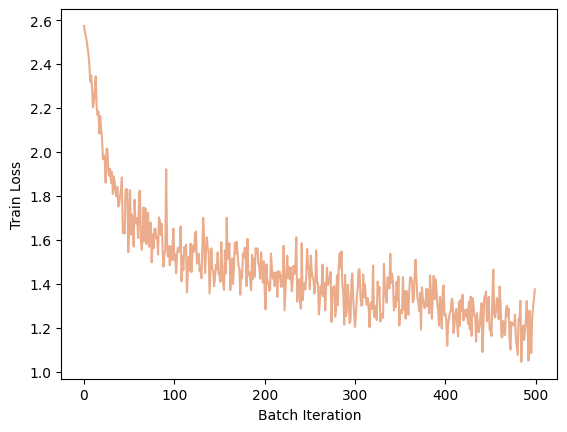

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot([i for i in range(len(all_loss))], all_loss, label="Train")
plt.xlabel('Batch Iteration')
plt.ylabel('Train Loss')
plt.show()

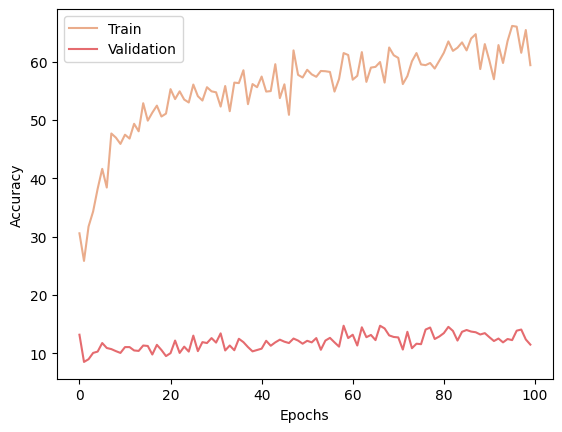

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 256  # Number of hidden units in RNN
num_classes = 13  # For three-class classification
epochs = 100
learning_rate = 0.001
batch_size = 512
landa = 0.001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(X_train, dtype=t.float32), t.tensor(y_train, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(X_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.LSTM(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
# rnn_layer2 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):
    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        # out, _ = rnn_layer2(out)
        # out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)

        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()


Epoch 0/100 ---> Train Accuracy: 31.561461794019934%, Validation Accuracy: 9.595375722543352%
Epoch 1/100 ---> Train Accuracy: 29.858803986710964%, Validation Accuracy: 8.554913294797688%
Epoch 2/100 ---> Train Accuracy: 34.01162790697674%, Validation Accuracy: 9.672447013487476%
Epoch 3/100 ---> Train Accuracy: 38.03986710963455%, Validation Accuracy: 11.599229287090559%
Epoch 4/100 ---> Train Accuracy: 39.119601328903656%, Validation Accuracy: 10.48169556840077%
Epoch 5/100 ---> Train Accuracy: 40.53156146179402%, Validation Accuracy: 9.672447013487476%
Epoch 6/100 ---> Train Accuracy: 43.18936877076412%, Validation Accuracy: 10.48169556840077%
Epoch 7/100 ---> Train Accuracy: 40.946843853820596%, Validation Accuracy: 10.366088631984585%
Epoch 8/100 ---> Train Accuracy: 42.64950166112957%, Validation Accuracy: 9.364161849710984%
Epoch 9/100 ---> Train Accuracy: 43.604651162790695%, Validation Accuracy: 9.672447013487476%
Epoch 10/100 ---> Train Accuracy: 45.7641196013289%, Validation

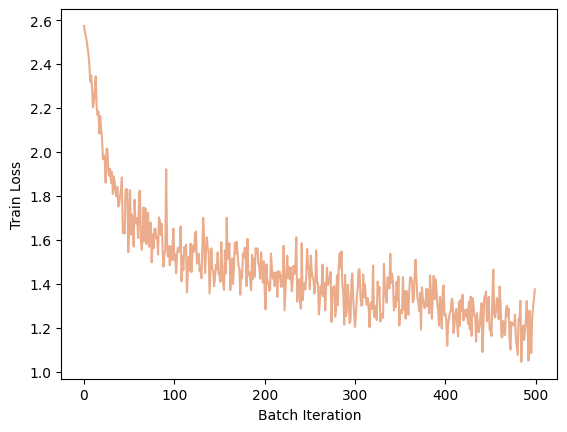

In [ ]:
plt.plot([i for i in range(len(all_loss))], all_loss, label="Train")
plt.xlabel('Batch Iteration')
plt.ylabel('Train Loss')
plt.show()

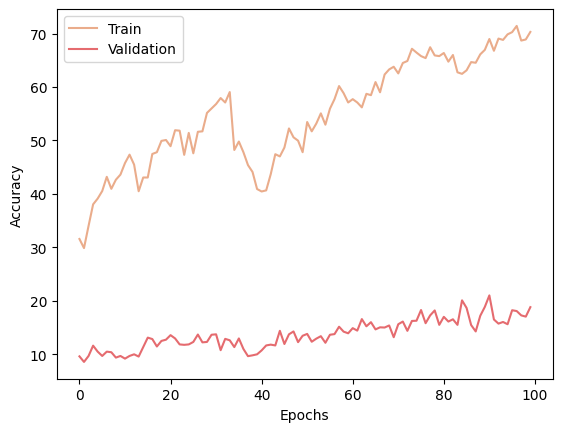

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()